------------
#Sentiment Analysis for Amazon Multilingual Review Corpus 
####Author: Tong Luo
####Date: 10/31/2022
------------
### Introduction to Sentiment Analysis

Sentiment analysis is an Machine Learning technology that extracts meanings from language input, e.g. text, voice. It can be classified into following categories:
* a. Satisfaction rating, binary (e.. satisfied, not satisfied), or customer ratings (e.g. satisfaction range in [-1, 0, 1] or [1 to 5])
* b. Emotion detection (e.g. happy, sad, mad, shock, grief, frustracted, etc.)
* c. Fine grained analysis (e.g, topics, subtopics)
* d. Intent based analysis (e.g. "The product is fine, but I need to change batter often")
* e. Aspect based analysis (e.g. 'This hammock's nylon fabric is lightweight and easy to clean, but a little scratch can totally ruin it').

Sentiment analysis have wide applications in broad variety of business. It products very import information to business decision makers because it can be used to find out brand popularity, customer satisfaction, need for customer service, demographic and market analysis, marketing ROI returns et al.  

Tradition machine learning methods use regression, classification, feature engineering methods. It is able to produce rating classifications but not perform well to catch semantic subtleties such as sarcasms in sentences, and misinterpret user's true intention. ["Attention"](https://drive.google.com/file/d/1ZnnayrP7Ue3gRWl7EycHRJuEelkUzNOo/view?usp=sharing) concept was proposed by Bahdanau[19](https://arxiv.org/abs/1409.0473),Minh-Tangh[20](https://arxiv.org/abs/1508.04025) to catch the context information for each word in sentences. Recent ["transformer"](https://drive.google.com/file/d/1LsT-esnOO0fdUcNviaGS68b-GRyjqywU/view?usp=sharing) [1](https://arxiv.org/pdf/1706.03762.pdf) based NLP models, such as Bert based models [2](https://arxiv.org/abs/1810.04805v2),[3](https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment), using [self and multi-headed attention](https://drive.google.com/file/d/1Ttdw1sST-w3R8qLOZGhFNHszBaySOKfz/view?usp=sharing), and [encoder-decoder attention](https://drive.google.com/file/d/1Oqz-RxpDJ_RyMjtzPpj65p4PYdcW9q4O/view?usp=sharing) mechanism [1](https://arxiv.org/pdf/1706.03762.pdf) have achieved significant higher accuracy in language understanding and shows promising new landscape for NLU applications.

###My works for this assignment
------------
In this assignment I did sentiment analysis on Multilingual Amazon Revieew Corpus (MARC) dataset. The work is presented in following order:
  1. Data validation and visualization: check invalid data and data distribution.
  2. Using nlptown/bert-base-multilingual-uncased-sentiment model[3](https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment) on MARC to produce user rating .This model was finetuned for sentiment analysis on product reviews in six languages: English, Dutch, German, French, Spanish and Italian. It predicts the sentiment of the review as a number of stars (between 1 and 5).
  3. The initial result from the Bert-based system shows good accuracy (62.7%) on MARC data set. This Bert based model was not trained with Amazon dataset.
  4. Literatures [12](https://arxiv.org/abs/1911.02116),[13](https://towardsdatascience.com/), shows RoBerta based has higher (~30%) accuracy performance. I find a lewtun/XML Roberta model from hugging face [4][5], which was trained on Amazon MARC and did a comparison with Bert based model. Surprisingly, the lewtun/XML-RoBERTa model produced lower accuracy (achieved 58.2%) than the Bert based model. I found out that simply padding to max-length can cause the model to lose focus significantly. I did some research and found "smart padding" [17](https://towardsdatascience.com/multilingual-amazon-reviews-classification-f55f8a650c9a) can improve sentimental accuracy.  
  5. I also found out that differnt feature engineering can affect accuracy. Combining review_title and product_category with review_body can improve the accuracy. The order of the feature matters too. Best accuracy is achieved by puting review_title at first place, product_category at sencond place, and review_body at third place. I used "smart padding" together this multi-feature engineering technology in my analysis and achieved 65.4% accuracy, significantly better than the [Keung's paper](https://arxiv.org/abs/2010.02573) that introduced Amazon MARC dataset.
------------
##Tong's model win!
------------
* 1st Place: Tong's XML_RoBerta model           (0.654)
* 2nd Place: NLPTown's Bert_base_Model          (0.627)
* 3rd Place: Lewtun's XML_RoBerta_base          (0.582)
------------
  6. I learned to used huggingface trainer to do the training job this, and published the trained model on hugging face for public [trail and download](https://huggingface.co/tlttl/tluo_xml_roberta_base_amazon_review_sentiment_v3) [18](https://huggingface.co/tlttl/tluo_xml_roberta_base_amazon_review_sentiment_v3) .
  7. The original Amazon MARC dataset has 1.2M rows in training set, and 30k rows for validation and testing set. To speed up the training, I use dataset sharding technology, train the model on 1/10 of training, and 1/5 of validation data. Total training time is about 2.58 hours.
  8. To fine tune the model, I used Auto hyper parameter search of this model and obtained optimized hyperparameter set.
  9. Study Transformer and BERT architecture. Here is my [summary](https://drive.google.com/file/d/1Og0Ip334e5lDgvsSogejZ2l5FXtvVDsG/view?usp=sharing) and related [complexity analysis numbers](https://drive.google.com/file/d/1WOexPGcpbl9J3CtnRgMwGJWCyEOmCNyR/view?usp=sharing).

###Future works:
------------
Transformer and Bert based models have some drawbacks such as difficult to explain the results, have large parameter size, etc. Attention mechanism of Bert provides an opportunity to fine tune our focus (i.e attention) to the right wordss in sentences, and hence opens up new areas of application such as fine-grain, aspect, emotion and intent analysis.  
Akbar et.al [6](https://arxiv.org/abs/2001.11316) proposed BERT Adversarial Training (BAT) model for aspect based semantic analysis. Manish et.al proposed fine grained sentimental analysis [7](https://ieeexplore.ieee.org/document/8947435). Qian Chen etal. proposed joint intention based Bert[8](https://arxiv.org/pdf/1902.10909.pdf). Chiorrini et.al proposed ways to fine tune Bert model to achieve good emotion prediction[9](https://www.researchgate.net/publication/350591267_Emotion_and_sentiment_analysis_of_tweets_using_BERT). Adoma et.al compared emotion analysis of several Bert based models [10](https://ieeexplore.ieee.org/abstract/document/9317379). These technologies can be very helpful to Amazon's busines.

Many research works are done to reduce BERT parameter size and to speed up the training process. Recent works can be found in DistilBert [14](https://arxiv.org/abs/1910.01108), TinyBert [15](https://dair.ai/TinyBERT-Size_does_matter,_but_how_you_train_it_can_be_more_important/), MiniML [16](https://arxiv.org/abs/2002.10957). The new models can reduce parameter size 30~50%, yet still maintain comparable performance. 

Bert was open sourced by Google Research [24](https://github.com/google-research/bert]). Many NLU tasks can be retrained on custom data in short time using pretrained Bert models. BERT NLU application helpers are available on Hugging face for many different tasks, such as BerForSentencePrediction[21](https://huggingface.co/docs/transformers/model_doc/bert#transformers.BertForNextSentencePrediction), BertForQuestionAnswering[22](https://huggingface.co/docs/transformers/model_doc/bert#transformers.BertForQuestionAnswering), BertForMultipleChoice[23](https://huggingface.co/docs/transformers/model_doc/bert#transformers.BertForMultipleChoice), and many more.


###Problems encountered
------------
1. Custom Training time is very long. The amazon MARC dataset is very big. I have to use shard methos to select 1/10 of the dataset to train the model. I am running with CoLab Pro+ account, using Standard GPU and High RAM options. It took me about 2:58 hours to train the XML RoBerta based model on 1/10 of Amazon MARC dataset to sentimental classification.
2. The space requirement is high. I got "CUDA out of memory" when I train the XML-RoBertaa based model. I have to limit the batch size to overcome this problem. Similiary commands exists in Windows or Linux.
"!export 'PYTORCH_CUDA_ALLOC_CONF=max_split_size_mb:512' "
3. Hyperparameter tunning requires even more memory. I got "Cuda out of memory" again when searching for hyperparameter using the 1/10 shard of dataset. I have to shard the dataset by another 1/100 (totally sharded 1/1000, using only about 12,000 rows of training data) in order to run parameter search. Google research [23] [summarized](https://drive.google.com/file/d/1-XvHep0EITROHEFYKtQqv14dBRYKMBkZ/view?usp=sharing) the memory useg factors are:
* max_seq_length
* train_batch_size
* Model type: Bert_Base vs Bert_Large
* Optimzer

4. Hugging face token missing when I tried to push the trained model to hugging face automatically from CoLab. I fixed this problem by importing hugging face library, login interface and obtaining token. I learned a "fast paste" trick to make hugging face accept my token, quite fun.
5. CoLab runtime get disconnected after 90 sec after no activity. Turning off screen locker does not help, quite annoying. I upgraded to Colab Pro +, which is helpful. I am able to re-connect to the runtime after being discounted. My training job was not inturrupted by the disconnect.

   

###References
------------
1.   Ashish Vaswani, Noam Shazeer, Niki Parmar, et. al. Transformer Architecture - Attention is all you need [6/12/2017 https://arxiv.org/pdf/1706.03762.pdf]
2.   Jacob Devlin, Ming-Wei Chang, Kenton Lee, et. al. BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding [10/11/2018  https://arxiv.org/abs/1810.04805v2]
3.   Bert-based-multilingual-uncased-sentimental model (by nlptown)[Ref https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment]
4.   xlm-roberta-base-finetuned-marc (by lewtun)[https://huggingface.co/lewtun/xlm-roberta-base-finetuned-marc]
5.   huggingface.io
6.   Aspect Based BERT[Ref https://arxiv.org/abs/2001.11316]
7.   Fine-grain BERT [https://ieeexplore.ieee.org/document/8947435]
8.   Joint intention BERT [https://arxiv.org/pdf/1902.10909.pdf]
9.   Emotion BERT [Ref https://www.researchgate.net/publication/350591267_Emotion_and_sentiment_analysis_of_tweets_using_BERT]
10.   Emotion BERT comparison [https://ieeexplore.ieee.org/abstract/document/9317379]
12.  RoBerta [https://arxiv.org/abs/1911.02116]
13.  Bert, RoBERTa, DistilBert, XLBert - which one to use. [https://towardsdatascience.com/bert-roberta-distilbert-xlnet-which-one-to-use-3d5ab82ba5f8]
14.  DistilBert [https://arxiv.org/abs/1910.01108]
15.  TinyBert [https://dair.ai/TinyBERT-Size_does_matter,_but_how_you_train_it_can_be_more_important/]
16.  MiniML [https://arxiv.org/abs/2002.10957]
17.  Smart Dynamic Padding [https://towardsdatascience.com/multilingual-amazon-reviews-classification-f55f8a650c9a]
18.  Tong's XML_RoBERTA based sentiment Amazon MARC [https://huggingface.co/tlttl/tluo_xml_roberta_base_amazon_review_sentiment_v3?text=I+like+you.+I+love+you]
19. Bahdanau, et. al. NMT with "Allign and Translate" [2014 https://arxiv.org/abs/1409.0473 ]
20. Minh-Thang, et. al. Attention based NMT [2015 https://arxiv.org/abs/1508.04025]
21. BertForSentencePrediction [https://huggingface.co/docs/transformers/model_doc/bert#transformers.BertForNextSentencePrediction]
22. BertForQuestionAnswering [https://huggingface.co/docs/transformers/model_doc/bert#transformers.BertForQuestionAnswering]
23. BertForMultipleChoice [https://huggingface.co/docs/transformers/model_doc/bert#transformers.BertForMultipleChoice]
24. Bert Source code, by Google Research[https://github.com/google-research/bert]
25. Bert Out of memory issues [https://github.com/google-research/bert#out-of-memory-issues]
26. Keung, Phillip et. al. The Multilingual Amazon Reviews Corpus[https://arxiv.org/abs/2010.02573]


###Connect with Google Drive. Go to project directory

In [ ]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
except ImportError:
    print("Not on google drive")

Mounted at /content/drive


In [ ]:
# TODO: Change directories ("cd") to the folder containing your
# notebook and data folder by replacing the filepath below
%cd /content/drive/MyDrive/Colab-Notebooks/Amazon-Assignment/

/content/drive/MyDrive/Colab-Notebooks/Amazon-Assignment


Install import Depencies

In [ ]:
!pip install transformers pandas numpy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 32.5 MB/s 
     |████████████████████████████████| 7.6 MB 97.8 MB/s 
     |████████████████████████████████| 163 kB 96.0 MB/s 


This command aviod CUDA out of memory problem 

In [ ]:
!export 'PYTORCH_CUDA_ALLOC_CONF=max_split_size_mb:512'

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import re

##Try Bert based Model
------------    
Using https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment

This a bert-base-multilingual-uncased model finetuned for sentiment analysis on product reviews in six languages: English, Dutch, German, French, Spanish and Italian. It predicts the sentiment of the review as a number of stars (between 1 and 5).

Model Size: 669M

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

Downloading:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/953 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/872k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/669M [00:00<?, ?B/s]

Encode a review and Calculate Sentiment

In [ ]:
# Try my own input, return PyTorch tensors 'pt'
comment5 = "I love this place, food is so delicious"
comment4 = "This is alright, as expected"
comment3 = "Its good, but could be better"
comment2 = "at begining it is ok, but it broke down quickly"
comment1 = "this product sucks"
tokens = tokenizer.encode(comment1, return_tensors='pt')
tokens

tensor([[  101, 10372, 20058, 59299, 10107,   102]])

In [ ]:
#Look into a token
tokens[0]

tensor([  101, 10372, 20058, 59299, 10107,   102])

In [ ]:
#convert back
de_tokens = tokenizer.decode(tokens[0]) 
de_tokens

'[CLS] this product sucks [SEP]'

In [ ]:
type(model)

transformers.models.bert.modeling_bert.BertForSequenceClassification

In [ ]:
result = model(tokens)
result

SequenceClassifierOutput(loss=None, logits=tensor([[ 3.4513,  1.7883,  0.2385, -1.9833, -2.6549]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [ ]:
torch.argmax(result.logits)

tensor(0)

Convert to rating, value 1 - 5

In [ ]:
rating = int(torch.argmax(result.logits)) + 1
rating

1

###Try XLM-Roberta-based Model
------------
XLM-RoBERTa model was pre-trained on 2.5TB of filtered CommonCrawl data containing 100 languages. It was introduced in the paper[5].
Here We use lewtun/xlm-roberta-base-finetuned-marc model on Huggingface
Model size 1.11G

In [ ]:
tokenizer2 = AutoTokenizer.from_pretrained('lewtun/xlm-roberta-base-finetuned-marc')
model2 = AutoModelForSequenceClassification.from_pretrained('lewtun/xlm-roberta-base-finetuned-marc')

Downloading:   0%|          | 0.00/398 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/976 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

In [ ]:
def rate_a_review2(review):
  tokens = tokenizer2.encode(review, 
                            add_special_tokens = True,    # add [CLS], [SEP]
                            truncation = True,
                            max_length = 512,             # max length of text that can go to bert
                            #padding = 'max_length',       # add [PAD] tokens
                            return_attention_mask = True, # not focus on [PAD] token
                            return_tensors='pt')          # Pytorch token
  
  result = model2(tokens)
  return int(torch.argmax(result.logits)) + 1


In [ ]:
comment1

'this product sucks'

In [ ]:
rate_a_review2(comment1)

3

###Note
This result 3 is different than Bert Base model, and I feel 3 is not reasonable. Lets look under the hood. 
comment padding and return_attention_mask we will get result 1.

In [ ]:
tokens = tokenizer2.encode(comment1, return_tensors='pt')
tokens

tensor([[    0,   903, 12996,   166, 22824,     2]])

We can see XML-RoBerta generates different token than bert_based tokenizer

In [ ]:
#convert back
de_tokens = tokenizer2.decode(tokens[0]) 
de_tokens

'<s> this product sucks</s>'

In [ ]:
result = model2(tokens)
result

In [ ]:
rating = int(torch.argmax(result.logits)) + 1
rating

1

"1" is a reasonable rating. I found padding = 'max_length' in function2 is causing problem, so I commented it. Padding short review to max lenth is problematic. Later in my own training model, we use smart padding. model 

###Load the Amazon multi-lingual Reviews dataset
Size: 610.66M

In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 441 kB 27.3 MB/s 
     |████████████████████████████████| 212 kB 95.9 MB/s 
     |████████████████████████████████| 115 kB 80.0 MB/s 
     |████████████████████████████████| 127 kB 97.3 MB/s 
     |████████████████████████████████| 115 kB 88.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
from datasets import load_dataset, load_metric

In [ ]:
dataset = load_dataset('amazon_reviews_multi')

Extracting data files:   0%|          | 0/6 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/6 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/6 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1200000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/30000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/30000 [00:00<?, ? examples/s]

Dataset amazon_reviews_multi downloaded and prepared to /root/.cache/huggingface/datasets/amazon_reviews_multi/all_languages/1.0.0/724e94f4b0c6c405ce7e476a6c5ef4f87db30799ad49f765094cf9770e0f7609. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 1200000
    })
    validation: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 30000
    })
    test: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 30000
    })
})

In [ ]:
train_df = dataset['train'].to_pandas()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

### Visualize train data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'train_df: stars')

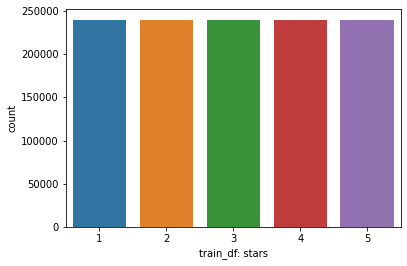

In [ ]:
sns.countplot(train_df.stars)
plt.xlabel("train_df: stars")

In [ ]:
train_df.isnull().sum()

review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
language            0
product_category    0
dtype: int64

Observation:
train dataset 'stars' rating is evenly distributed accross all values, all data cells are valid

### Visualize validation data

In [ ]:
validation_df = dataset['validation'].to_pandas()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'validation_df: stars')

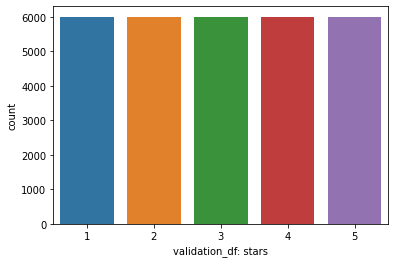

In [ ]:
sns.countplot(validation_df.stars)
plt.xlabel("validation_df: stars")

In [ ]:
validation_df.isnull().sum()

review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
language            0
product_category    0
dtype: int64

Observation:
validation dataset 'stars' rating is evenly distributed accross all values, all data cells are valid

### Visualize test data

In [ ]:
test_df = dataset['test'].to_pandas()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'test_df: stars')

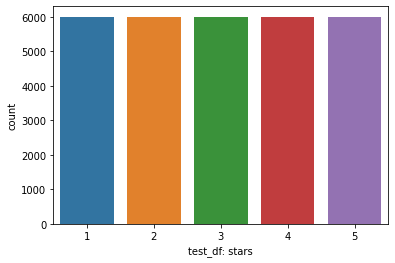

In [ ]:
sns.countplot(test_df.stars)
plt.xlabel("test_df: stars")

In [ ]:
test_df.isnull().sum()

review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
language            0
product_category    0
dtype: int64

Observation:
test dataset 'stars' rating is evenly distributed accross all values, all data cells are valid

In [ ]:
test_df.iloc[0]['review_body']

'Leider, leider nach einmal waschen ausgeblichen . Es sieht super hübsch aus , nur leider stinkt es ganz schrecklich und ein Waschgang in der Maschine ist notwendig ! Nach einem mal waschen sah es aus als wäre es 10 Jahre alt und hatte 1000 e von Waschgängen hinter sich :( echt schade !'

English Translation: 'Unfortunately, unfortunately faded after washing once. It looks super pretty, but unfortunately it stinks terribly and a washing cycle in the machine is necessary! After one wash it looked like it was 10 years old and had 1000s of washes behind it :( really a shame!'

In [ ]:
test_df

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,de_0784695,product_de_0572654,reviewer_de_0645436,1,"Leider, leider nach einmal waschen ausgebliche...",Leider nicht zu empfehlen,de,home
1,de_0759207,product_de_0567331,reviewer_de_0183703,1,zunächst macht der Anker Halter einen soliden ...,Gummierung nach 6 Monaten kaputt,de,wireless
2,de_0711785,product_de_0482105,reviewer_de_0182152,1,Siegel sowie Verpackung war beschädigt und war...,Flohmarkt ware,de,industrial_supplies
3,de_0964430,product_de_0616480,reviewer_de_0991563,1,Habe dieses Produkt NIE erhalten und das Geld ...,Katastrophe,de,industrial_supplies
4,de_0474538,product_de_0228702,reviewer_de_0316188,1,Die Träger sind schnell abgerissen,Reißverschluss klemmt,de,luggage
...,...,...,...,...,...,...,...,...
29995,zh_0691813,product_zh_0978860,reviewer_zh_0800380,5,用的少，意大利的，偶尔会煮下。。。。。。。,用的少，应该还可以的,zh,kitchen
29996,zh_0720214,product_zh_0929524,reviewer_zh_0944464,5,QAQ熬夜看完的。 这竟然是一个真实的爱情故事。 觉得可以改编成爱情电影了。 hoho。,QAQ这是一段爱情之旅。,zh,book
29997,zh_0651091,product_zh_0654154,reviewer_zh_0959472,5,上午十点下单，下午就送到我手里了，简直神速，不能更满意了,很好,zh,book
29998,zh_0299325,product_zh_0871641,reviewer_zh_0119054,5,洗护用品很好卖家送了两个方便折叠小梳子，非常方便,很好,zh,beauty


Check an null data 

In [ ]:
test_df.info

<bound method DataFrame.info of         review_id          product_id          reviewer_id  stars  \
0      de_0784695  product_de_0572654  reviewer_de_0645436      1   
1      de_0759207  product_de_0567331  reviewer_de_0183703      1   
2      de_0711785  product_de_0482105  reviewer_de_0182152      1   
3      de_0964430  product_de_0616480  reviewer_de_0991563      1   
4      de_0474538  product_de_0228702  reviewer_de_0316188      1   
...           ...                 ...                  ...    ...   
29995  zh_0691813  product_zh_0978860  reviewer_zh_0800380      5   
29996  zh_0720214  product_zh_0929524  reviewer_zh_0944464      5   
29997  zh_0651091  product_zh_0654154  reviewer_zh_0959472      5   
29998  zh_0299325  product_zh_0871641  reviewer_zh_0119054      5   
29999  zh_0470070  product_zh_0619157  reviewer_zh_0446556      5   

                                             review_body  \
0      Leider, leider nach einmal waschen ausgebliche...   
1      zunächst mac

In [ ]:
review_df = test_df[['review_body', 'review_title', 'product_category', 'language', 'stars']]
review_df

,review_body,review_title,product_category,language,stars
0,"Leider, leider nach einmal waschen ausgebliche...",Leider nicht zu empfehlen,home,de,1
1,zunächst macht der Anker Halter einen soliden ...,Gummierung nach 6 Monaten kaputt,wireless,de,1
2,Siegel sowie Verpackung war beschädigt und war...,Flohmarkt ware,industrial_supplies,de,1
3,Habe dieses Produkt NIE erhalten und das Geld ...,Katastrophe,industrial_supplies,de,1
4,Die Träger sind schnell abgerissen,Reißverschluss klemmt,luggage,de,1
...,...,...,...,...,...
29995,用的少，意大利的，偶尔会煮下。。。。。。。,用的少，应该还可以的,kitchen,zh,5
29996,QAQ熬夜看完的。 这竟然是一个真实的爱情故事。 觉得可以改编成爱情电影了。 hoho。,QAQ这是一段爱情之旅。,book,zh,5
29997,上午十点下单，下午就送到我手里了，简直神速，不能更满意了,很好,book,zh,5
29998,洗护用品很好卖家送了两个方便折叠小梳子，非常方便,很好,beauty,zh,5


**Original comment:**
'Leider, leider nach einmal waschen ausgeblichen . Es sieht super hübsch aus , nur leider stinkt es ganz schrecklich und ein Waschgang in der Maschine ist notwendig ! Nach einem mal waschen sah es aus als wäre es 10 Jahre alt und hatte 1000 e von Waschgängen hinter sich :( echt schade !'

**English translation:**
'Unfortunately, unfortunately faded after one wash. It looks super pretty, but unfortunately it stinks terribly and a washing cycle in the machine is necessary! After one wash it looked like it was 10 years old and had 1000s of washes behind it :( really a shame!'

###Get all English Reviews
------------

In [ ]:
review_en_df= review_df[ review_df['language'] == 'en']
review_en_df

,review_body,review_title,product_category,language,stars
5000,"These are AWFUL. They are see through, the fab...",Don’t waste your time!,apparel,en,1
5001,I bought 4 and NONE of them worked. Yes I used...,One Star,other,en,1
5002,On first use it didn't heat up and now it does...,Totally useless,other,en,1
5003,You want an HONEST answer? I just returned fro...,Gold filled earrings,jewelry,en,1
5004,The glue works fine but the container is impos...,Poor container,industrial_supplies,en,1
...,...,...,...,...,...
9995,"It's still early, but so far the scales seems ...",Very sleek.,drugstore,en,5
9996,I’ve used this face mask a few times now and i...,... face mask a few times now and it works gre...,beauty,en,5
9997,Great price. Good quality.,Five Stars,home,en,5
9998,Fits my 2016 F150 XLT great. Now I dont have t...,2016 F150 XLT,automotive,en,5



Note we have total 5000 rows of English review


###Feature Engineering:
Putting 'review_title', 'product_category' ahead of 'review_body', together to get important info about the review

In [ ]:
def rate_a_review_comb(review):
  text_combine = review['review_title'] + " " + review['product_category'] + " " + review['review_body']
  tokens = tokenizer.encode(text_combine,                 # Tokenize the cimbined 3 fields
                            add_special_tokens = True,    # add [CLS], [SEP]
                            truncation = True,
                            max_length = 512,             # max length of text that can go to bert
                            #padding = 'max_length',       # add [PAD] tokens
                            return_attention_mask = True, # not focus on [PAD] token
                            return_tensors='pt')          # Pytorch token
  result = model(tokens)
  return int(torch.argmax(result.logits)) + 1


Test our new model
 on one row

In [ ]:
review_en_text = review_en_df.iloc[0]
review_en_text

review_body         These are AWFUL. They are see through, the fab...
review_title                                   Don’t waste your time!
product_category                                              apparel
language                                                           en
stars                                                               1
Name: 5000, dtype: object

In [ ]:
rate_a_review_comb(review_en_text)

1

Rating of 1 looks reasonable for this row.
Lets run on the whole test_data_set

Run bert_base model on the first 100 random selected row, otherwise take too long to run over the whole test dataset, time out on the whole dataset

In [ ]:
review_en_1000_df = review_en_df.sample(n = 1000)

In [ ]:
review_en_1000_df.describe()

,stars
count,1000.000000
mean,3.084000
std,1.421606
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'bert_base: stars')

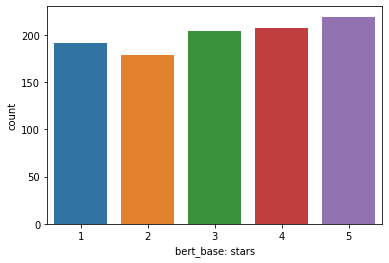

In [ ]:
sns.countplot(review_en_1000_df.stars)
plt.xlabel("bert_base: stars")

###Run BERT based model on this 1000 test data set 

In [ ]:
review_en_1000_df['new_rating'] = review_en_1000_df.apply(rate_a_review_comb, axis = 1)



NameError: ignored

In [ ]:
review_en_1000_df

,review_body,review_title,product_category,language,stars,new_rating
9118,Works amazing with my dress shoes and canvas s...,Five Stars,shoes,en,5,5
6985,We bought this as a replacement for another ki...,Does not play notes accurately,toy,en,2,2
5846,this started out to be a great knife for being...,"looks good, but not what expected",other,en,1,2
6045,"I really wanted to like this stapler, I truly ...",Not reliable,office_product,en,2,2
7498,I like it but it gets all tangled together,Gets tangled,jewelry,en,3,3
...,...,...,...,...,...,...
5264,Case is nice and feels good. Was not able to c...,"Nice case, no hardware",other,en,1,3
5784,Terrible color and texture. Trying to salvage ...,Terrible,beauty,en,1,1
8304,Will use at night. Really like the unit but so...,Sound control is touchy,electronics,en,4,3
6481,This battery did not take the charge it was su...,NOt the best,pc,en,2,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


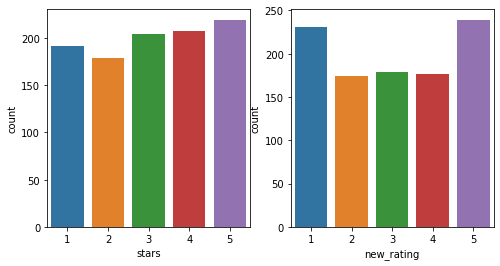

In [ ]:
fig, ax =plt.subplots(1,2, figsize=(8, 4))
sns.countplot(review_en_1000_df.stars, ax=ax[0])
sns.countplot(review_en_1000_df.new_rating, ax=ax[1])
fig.show()




In [ ]:
# new accuracy function
def get_accuracy(df, col_name1, col_name2):
  num_correct = 0
  num_wrong = 0
  for i in range(len(df)):
    if int(df.iloc[i][col_name1]) == int(df.iloc[i][col_name2]):
      num_correct += 1
    else:
      num_wrong += 1
  return num_correct/(num_correct + num_wrong)

In [ ]:
get_accuracy(review_en_1000_df, 'stars', 'new_rating')

0.627

### Run XLM-RoBERTa-base Model

In [ ]:
def rate_a_review_comb2(review):
  text_combine =  review['review_title'] + " " + review['product_category'] + " " + review['review_body']
  tokens = tokenizer2.encode(text_combine,                # Tokenize the cimbined 3 fields, changed to lower case
                            add_special_tokens = True,    # add [CLS], [SEP]
                            truncation = True,
                            max_length = 512,             # max length of text that can go to bert
                            #padding = 'max_length',       # add [PAD] tokens
                            return_attention_mask = True, # not focus on [PAD] token
                            return_tensors='pt')          # Pytorch token
  result = model2(tokens)
  return int(torch.argmax(result.logits)) + 1


In [ ]:
review_en_1000_df['new_rating2'] = review_en_1000_df.apply(rate_a_review_comb2, axis = 1)
review_en_1000_df

,review_body,review_title,product_category,language,stars,new_rating,new_rating2
9118,Works amazing with my dress shoes and canvas s...,Five Stars,shoes,en,5,5,5
6985,We bought this as a replacement for another ki...,Does not play notes accurately,toy,en,2,2,2
5846,this started out to be a great knife for being...,"looks good, but not what expected",other,en,1,2,2
6045,"I really wanted to like this stapler, I truly ...",Not reliable,office_product,en,2,2,2
7498,I like it but it gets all tangled together,Gets tangled,jewelry,en,3,3,3
...,...,...,...,...,...,...,...
5264,Case is nice and feels good. Was not able to c...,"Nice case, no hardware",other,en,1,3,2
5784,Terrible color and texture. Trying to salvage ...,Terrible,beauty,en,1,1,2
8304,Will use at night. Really like the unit but so...,Sound control is touchy,electronics,en,4,3,4
6481,This battery did not take the charge it was su...,NOt the best,pc,en,2,2,2


Observation from some row like 6484, 8805, the Roberta model is doing better.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


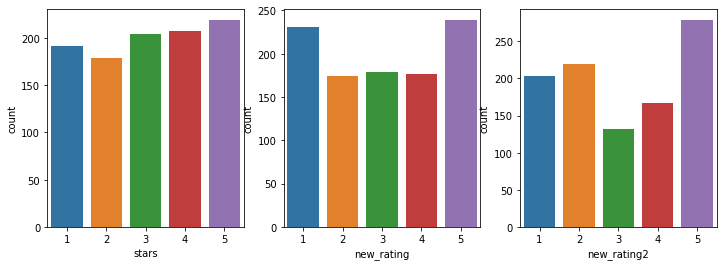

In [ ]:
fig, ax =plt.subplots(1,3, figsize=(12, 4))
sns.countplot(review_en_1000_df.stars, ax=ax[0])
sns.countplot(review_en_1000_df.new_rating, ax=ax[1])
sns.countplot(review_en_1000_df.new_rating2, ax=ax[2])
fig.show()


In [ ]:
#rating_accuracy(review_en_100_df, 'stars', 'new_rating2')
get_accuracy(review_en_1000_df, 'stars', 'new_rating2')

0.582

###Observation: XLM-RoBERTa based model perform worse that BERT based
Surprise, the XML RoBERTa based model achieved 0.582, which is lower than the BERT base model 0.627.

###Tong's XML RoBERTa model: 
------------
tlttl/tluo_xml_roberta_base_amazon_review_sentiment_v3

Size 1.11G

In [ ]:
tokenizer3 = AutoTokenizer.from_pretrained('tlttl/tluo_xml_roberta_base_amazon_review_sentiment_v3')
model3 = AutoModelForSequenceClassification.from_pretrained('tlttl/tluo_xml_roberta_base_amazon_review_sentiment_v3')

Downloading:   0%|          | 0.00/451 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/280 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

In [ ]:
def rate_a_review_comb3(review):
  text_combine = review['review_title'] + " " + review['product_category'] + " " + review['review_body']
  tokens = tokenizer3.encode(text_combine,                # Tokenize the cimbined 3 fields, changed to lower case
                            add_special_tokens = True,    # add [CLS], [SEP]
                            truncation = True,
                            max_length = 512,             # max length of text that can go to bert
                            #padding = 'max_length',       # add [PAD] tokens
                            return_attention_mask = True, # not focus on [PAD] token
                            return_tensors='pt')          # Pytorch token
  result = model3(tokens)
  return int(torch.argmax(result.logits)) + 1


In [ ]:
review_en_1000_df['new_rating3'] = review_en_1000_df.apply(rate_a_review_comb3, axis = 1)
review_en_1000_df

,review_body,review_title,product_category,language,stars,new_rating,new_rating2,new_rating3
9118,Works amazing with my dress shoes and canvas s...,Five Stars,shoes,en,5,5,5,5
6985,We bought this as a replacement for another ki...,Does not play notes accurately,toy,en,2,2,2,2
5846,this started out to be a great knife for being...,"looks good, but not what expected",other,en,1,2,2,2
6045,"I really wanted to like this stapler, I truly ...",Not reliable,office_product,en,2,2,2,2
7498,I like it but it gets all tangled together,Gets tangled,jewelry,en,3,3,3,3
...,...,...,...,...,...,...,...,...
5264,Case is nice and feels good. Was not able to c...,"Nice case, no hardware",other,en,1,3,2,2
5784,Terrible color and texture. Trying to salvage ...,Terrible,beauty,en,1,1,2,1
8304,Will use at night. Really like the unit but so...,Sound control is touchy,electronics,en,4,3,4,4
6481,This battery did not take the charge it was su...,NOt the best,pc,en,2,2,2,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

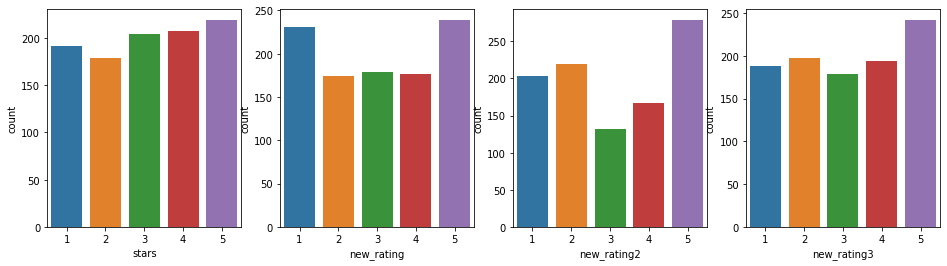

In [ ]:

fig, ax =plt.subplots(nrows=1, ncols=4, figsize=(16, 4))
sns.countplot(review_en_1000_df.stars, ax=ax[0])
sns.countplot(review_en_1000_df.new_rating, ax=ax[1])
sns.countplot(review_en_1000_df.new_rating2, ax=ax[2])
sns.countplot(review_en_1000_df.new_rating3, ax=ax[3])

fig.show()


In [ ]:
get_accuracy(review_en_1000_df, 'stars', 'new_rating3')


0.654

##Tong's model win the trophy!
------------
1. Tong's XML_RoBerta model (0.654)
2. Bert base                (0.627)
3. XML_RoBerta_base         (0.582)





# Train XML_RoBERTa based model on Amazon MARC Dataset, 
--------------------------------------------------------
* using smart padding
* 🤗 Hugging face Trainer
* push to tained model to Hugging face
* Causion: Training takes about 2:58 hours. Make sure yuo have enough runtime.


IF have not not load the related library and dataset, ncomment the following cell and run it.

In [ ]:
! pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Loading the dataset

In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


We will use the [🤗 Datasets](https://github.com/huggingface/datasets) library to download the data and get the metric we need to use for evaluation (to compare our model to the benchmark). This can be easily done with the functions `load_dataset` and `load_metric`.  

In [ ]:
!export 'PYTORCH_CUDA_ALLOC_CONF=max_split_size_mb:512'

In [ ]:
from datasets import load_dataset, load_metric

If you have not load dataset, uncomment and run followwing block.

In [ ]:
dataset = load_dataset('amazon_reviews_multi')

  0%|          | 0/3 [00:00<?, ?it/s]

The `dataset` object itself is [`DatasetDict`](https://huggingface.co/docs/datasets/package_reference/main_classes.html#datasetdict), which contains one key for the training, validation and test set.

As you can see below the dataset has 1.2MM training examples and 30K validation examples.

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 1200000
    })
    validation: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 30000
    })
    test: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 30000
    })
})

To access an actual element, you need to select a split first, then give an index:

In [ ]:
dataset["train"][0]

{'review_id': 'de_0203609',
 'product_id': 'product_de_0865382',
 'reviewer_id': 'reviewer_de_0267719',
 'stars': 1,
 'review_body': 'Armband ist leider nach 1 Jahr kaputt gegangen',
 'review_title': 'Leider nach 1 Jahr kaputt',
 'language': 'de',
 'product_category': 'sports'}

The metric is an instance of [`datasets.Metric`](https://huggingface.co/docs/datasets/package_reference/main_classes.html#datasets.Metric):

In [ ]:
metric = load_metric('accuracy')
metric

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  """Entry point for launching an IPython kernel.


Metric(name: "accuracy", features: {'predictions': Value(dtype='int32', id=None), 'references': Value(dtype='int32', id=None)}, usage: """
Args:
    predictions (`list` of `int`): Predicted labels.
    references (`list` of `int`): Ground truth labels.
    normalize (`boolean`): If set to False, returns the number of correctly classified samples. Otherwise, returns the fraction of correctly classified samples. Defaults to True.
    sample_weight (`list` of `float`): Sample weights Defaults to None.

Returns:
    accuracy (`float` or `int`): Accuracy score. Minimum possible value is 0. Maximum possible value is 1.0, or the number of examples input, if `normalize` is set to `True`.. A higher score means higher accuracy.

Examples:

    Example 1-A simple example
        >>> accuracy_metric = datasets.load_metric("accuracy")
        >>> results = accuracy_metric.compute(references=[0, 1, 2, 0, 1, 2], predictions=[0, 1, 1, 2, 1, 0])
        >>> print(results)
        {'accuracy': 0.5}

   

In [ ]:
f1_metric = load_metric('f1')
f1_metric

Metric(name: "f1", features: {'predictions': Value(dtype='int32', id=None), 'references': Value(dtype='int32', id=None)}, usage: """
Args:
    predictions (`list` of `int`): Predicted labels.
    references (`list` of `int`): Ground truth labels.
    labels (`list` of `int`): The set of labels to include when `average` is not set to `'binary'`, and the order of the labels if `average` is `None`. Labels present in the data can be excluded, for example to calculate a multiclass average ignoring a majority negative class. Labels not present in the data will result in 0 components in a macro average. For multilabel targets, labels are column indices. By default, all labels in `predictions` and `references` are used in sorted order. Defaults to None.
    pos_label (`int`): The class to be considered the positive class, in the case where `average` is set to `binary`. Defaults to 1.
    average (`string`): This parameter is required for multiclass/multilabel targets. If set to `None`, the sco

You can call its `compute` method with your predictions and labels directly and it will return a dictionary with the metric(s) value:

In [ ]:
import numpy as np

fake_preds = np.random.randint(1, 6, size=(64,))
fake_labels = np.random.randint(1, 6, size=(64,))
metric.compute(predictions=fake_preds, references=fake_labels)

{'accuracy': 0.265625}

In [ ]:
f1_metric.compute(predictions=fake_preds, references=fake_labels, average='weighted')

{'f1': 0.25884154831523254}

## Preprocessing the data

Before we can feed those texts to our model, we need to preprocess them. This is done by a 🤗 Transformers `Tokenizer` which will (as the name indicates) tokenize the inputs (including converting the tokens to their corresponding IDs in the pretrained vocabulary) and put it in a format the model expects, as well as generate the other inputs that model requires.

To do all of this, we instantiate our tokenizer with the `AutoTokenizer.from_pretrained` method, which will ensure:

- we get a tokenizer that corresponds to the model architecture we want to use,
- we download the vocabulary used when pretraining this specific checkpoint.

That vocabulary will be cached, so it's not downloaded again the next time we run the cell.

Since we are dealing with multi-lingual data, we will use the `xlm-roberta` model. This model is trained with data in over 100 languages. For more model options see [link](https://huggingface.co/transformers/multilingual.html)

To speed up the training process, we are going to train on a fraction of data.

In [ ]:
do_shard = True
if do_shard:
    dataset = dataset.shuffle(seed=123)
    train_dataset = dataset["train"].shard(index=1, num_shards=1000) 
    val_dataset = dataset['validation'].shard(index=1, num_shards=500) 
else:
    train_dataset = dataset['train']
    val_dataset = dataset['validation']

In [ ]:
val_dataset

Dataset({
    features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
    num_rows: 60
})

In [ ]:
from transformers import AutoTokenizer
model_checkpoint = 'xlm-roberta-base'
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)

Downloading:   0%|          | 0.00/615 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

We pass along `use_fast=True` to the call above to use one of the fast tokenizers (backed by Rust) from the 🤗 Tokenizers library. Those fast tokenizers are available for almost all models, but if you got an error with the previous call, remove that argument.

You can directly call this tokenizer on one sentence or a pair of sentences:

In [ ]:
tokenizer("Hello, this one sentence!", "为什么一个620卖1988，一个卖4299？都一样的吗？")

{'input_ids': [0, 35378, 4, 903, 1632, 149357, 38, 2, 2, 6, 23543, 1860, 910, 1549, 21633, 109332, 4, 1860, 21633, 13023, 5046, 32, 1198, 13326, 43, 9131, 32, 2], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

We can them write the function that will preprocess our samples. We just feed them to the `tokenizer` with the argument `truncation=True`. This will ensure that an input longer that what the model selected can handle will be truncated to the maximum length accepted by the model.

We concatenate the `review_body`, `review_title` and `product_category` in a string and pass that to the tokenizer. Concatenating title and product category along with body results in a significant increase in accuracy.

In [ ]:
import torch
max_len = 512
pad_to_max = False
def tokenize_data(example):
    # Tokenize the review body
    text_ =  example['review_title'] + " " + example['product_category'] + " " + example['review_body']
    encodings = tokenizer.encode_plus(text_, 
                                      pad_to_max_length=pad_to_max, 
                                      max_length=max_len,
                                      add_special_tokens=True,
                                      return_token_type_ids=False,
                                      return_attention_mask=True,
                                      return_overflowing_tokens=False,
                                      return_special_tokens_mask=False,
                                    )
    
    # Subtract 1 from labels to have them in range 0-4
    targets = torch.tensor(example['stars']-1,dtype=torch.long)
    

    encodings.update({'labels': targets})
    return encodings



In [ ]:
tokenize_data(dataset['train'][0]).keys()

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


dict_keys(['input_ids', 'attention_mask', 'labels'])

In [ ]:
encoded_train_dataset = pd.DataFrame(train_dataset).apply(tokenize_data, axis = 1)


In [ ]:
encoded_val_dataset = pd.DataFrame(val_dataset).apply(tokenize_data, axis = 1)

## Fine-tuning the model

In [ ]:
def pad_seq(seq, max_batch_len, pad_value):
    return seq + (max_batch_len - len(seq)) * [pad_value]

In [ ]:
from dataclasses import dataclass, field
from transformers import DataCollator
@dataclass
class SmartCollator():
    pad_token_id: int

    def __call__(self, batch):
        batch_inputs = list()
        batch_attention_masks = list()
        labels = list()
        max_size = max([len(ex['input_ids']) for ex in batch])
        for item in batch:
            batch_inputs += [pad_seq(item['input_ids'], max_size, self.pad_token_id)]
            batch_attention_masks += [pad_seq(item['attention_mask'], max_size, 0)]
            labels.append(item['labels'])

        return {"input_ids": torch.tensor(batch_inputs, dtype=torch.long),
                "attention_mask": torch.tensor(batch_attention_masks, dtype=torch.long),
                "labels": torch.tensor(labels, dtype=torch.long)
                }

Now that our data is ready, we can download the pretrained model and fine-tune it. Since all our tasks are about sentence classification, we use the `AutoModelForSequenceClassification` class. Like with the tokenizer, the `from_pretrained` method will download and cache the model for us. We set the num_labels as 5 and use a batch size of 8.

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
batch_size = 8
num_labels = 5

resume_training = False
if resume_training:
    model_checkpoint = 'test-results/checkpoint-20000'
else:
    model_checkpoint = 'xlm-roberta-base'
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=num_labels)

Downloading:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForSequenceClassification: ['lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.bias', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.out_p

The warning is telling us we are throwing away some weights (the `vocab_transform` and `vocab_layer_norm` layers) and randomly initializing some other (the `pre_classifier` and `classifier` layers). This is absolutely normal in this case, because we are removing the head used to pretrain the model on a masked language modeling objective and replacing it with a new head for which we don't have pretrained weights, so the library warns us we should fine-tune this model before using it for inference, which is exactly what we are going to do.

To instantiate a `Trainer`, we will need to define two more things. The most important is the [`TrainingArguments`](https://huggingface.co/transformers/main_classes/trainer.html#transformers.TrainingArguments), which is a class that contains all the attributes to customize the training. It requires one folder name, which will be used to save the checkpoints of the model, and all other arguments are optional:

In [ ]:
# Run this cell to automatically detect if GPU is available.
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(DEVICE)

cuda


In [ ]:
metric_name = "accuracy"

args = TrainingArguments(
    output_dir = "tluo_xml_roberta_base_amazon_review_sentiment_v3",
    seed = 123, 
    evaluation_strategy = "steps",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=3,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
    eval_steps = 5000,
    save_steps = 5000,
    fp16 = True,
    #push_to_hub = True
)

Loging into Huggingface
Note we set push_to_hub = True

In [ ]:
#!pip install huggingface_hub

In [ ]:
#from huggingface_hub import notebook_login

In [ ]:
#notebook_login()


Loaded on Huggingface:
https://huggingface.co/tlttl/'output_dir', e.g. output_dir = 'tluo_xml_roberta_base_amazon_review_sentiment_v#'

Here we set the evaluation to be done at the end of each epoch, tweak the learning rate, use the `batch_size` defined at the top of the notebook and customize the number of epochs for training, as well as the weight decay. Since the best model might not be the one at the end of training, we ask the `Trainer` to load the best model it saved (according to `metric_name`) at the end of training.

The last thing to define for our `Trainer` is how to compute the metrics from the predictions. We need to define a function for this, which will just use the `metric` we loaded earlier, the only preprocessing we have to do is to take the argmax of our predicted logits:

In [ ]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
 
    predictions = np.argmax(predictions, axis=1)

    return metric.compute(predictions=predictions, references=labels)

Pass all of arguments along with encoded datasets to the `Trainer`:

In [ ]:
validation_key = "validation"
trainer = Trainer(
    model,
    args,
    train_dataset= encoded_train_dataset, 
    eval_dataset=encoded_val_dataset,
    data_collator=SmartCollator(pad_token_id=tokenizer.pad_token_id),
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

Using cuda_amp half precision backend


`Note here` we pass along the `tokenizer` when we already preprocessed our data. This is because we will use it once last time to make all the samples we gather the same length by applying padding, which requires knowing the model's preferences regarding padding (to the left or right? with which token?). The `tokenizer` has a pad method that will do all of this right for us, and the `Trainer` will use it. You can customize this part by defining and passing your own `data_collator` which will receive the samples like the dictionaries seen above and will need to return a dictionary of tensors.

We can now finetune our model by just calling the `train` method:

In [ ]:
!nvidia-smi

Sun Oct 30 22:22:54 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    27W /  70W |   1932MiB / 15109MiB |     11%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#train_result = trainer.train()

After training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from test-results-concat/checkpoint-45000 (score: 0.6028333333333333).
TrainOutput(global_step=45000, training_loss=0.8911811781141493, metrics={'train_runtime': 9398.6684, 'train_samples_per_second': 38.303, 'train_steps_per_second': 4.788, 'total_flos': 2.260820027406552e+16, 'train_loss': 0.8911811781141493, 'epoch': 3.0})

We can check with the `evaluate` method that our `Trainer` did reload the best model properly (if it was not the last one):

Note here, train_runtime:9398.6648s, which is 2.56 Hours

In [ ]:
#perf_matrics = trainer.evaluate()

Note here: accuracy: 60.46%, which is slight higher than original paper 59.2% [17]

Need to call this command to explicit push model to hugging face:
https://huggingface.co/tlttl/test-results-concat

In [ ]:
#trainer.push_to_hub()

Our model gets an accuracy score of **60.46%** which is comparable to the accuracy score of 59.2% reported in the [paper](https://arxiv.org/abs/2010.02573)

# Hyperparameter search

The `Trainer` supports hyperparameter search using [optuna](https://optuna.org/) or [Ray Tune](https://docs.ray.io/en/latest/tune/). For this last section you will need either of those libraries installed, just uncomment the line you want on the next cell and run it.

In [ ]:
! pip install optuna
! pip install ray[tune]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 28.0 MB/s 
     |████████████████████████████████| 209 kB 90.2 MB/s 
     |████████████████████████████████| 81 kB 12.4 MB/s 
     |████████████████████████████████| 78 kB 9.7 MB/s 
     |████████████████████████████████| 112 kB 97.2 MB/s 
     |████████████████████████████████| 50 kB 8.3 MB/s 
     |████████████████████████████████| 147 kB 102.9 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=22db46ca8003bcf82175a8c16b98b7c56280dd6b311080cfdc48f7ee17e5b446
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 60.5 MB 96.4 MB/s 
     |████████████████████████████████| 8.8 MB 77

During hyperparameter search, the `Trainer` will run several trainings, so it needs to have the model defined via a function (so it can be reinitialized at each new run) instead of just having it passed. We jsut use the same function as before:

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
batch_size = 8
num_labels = 5

In [ ]:
metric_name = "accuracy"

args = TrainingArguments(
    output_dir = "tluo_xml_roberta_base_amazon_review_sentiment_v3",
    seed = 123, 
    evaluation_strategy = "steps",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=1,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
    eval_steps = 5000,
    save_steps = 5000,
    fp16 = True,
    #push_to_hub = True

)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [ ]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
 
    predictions = np.argmax(predictions, axis=1)

    return metric.compute(predictions=predictions, references=labels)

In [ ]:
def model_init():
    return AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=num_labels)

And we can instantiate our `Trainer` like before:

In [ ]:
!export 'PYTORCH_CUDA_ALLOC_CONF=max_split_size_mb:64'

###Important Note:
The method we call this time is `hyperparameter_search`. Note that it can take a long time to run on the full dataset for some of the tasks. You can try to find some good hyperparameter on a portion of the training dataset by replacing the `train_dataset` line by:
```python
train_dataset = encoded_dataset["train"].shard(index=1, num_shards=10) 
```
for 1/10th of the dataset. Then you can run a full training on the best hyperparameters picked by the search.

In [ ]:
#train_dataset_small = train_dataset.shard(index=1, num_shards=100) 
#encoded_train_dataset_small = pd.DataFrame(train_dataset_small).apply(tokenize_data, axis = 1)

In [ ]:
#val_dataset_small = val_dataset.shard(index=1, num_shards=100) 
#encoded_val_dataset_small = pd.DataFrame(val_dataset_small).apply(tokenize_data, axis = 1)

In [ ]:
validation_key = "validation"
trainer = Trainer(
    model_init=model_init,
    args=args,
    train_dataset= encoded_train_dataset, 
    eval_dataset=encoded_val_dataset,
    data_collator=SmartCollator(pad_token_id=tokenizer.pad_token_id),
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--xlm-roberta-base/snapshots/f6d161e8f5f6f2ed433fb4023d6cb34146506b3f/config.json
Model config XLMRobertaConfig {
  "_name_or_path": "xlm-roberta-base",
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "xlm-roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 1,
  "position_embedding_type": "absolute

In [ ]:
best_run = trainer.hyperparameter_search(n_trials=5, direction="maximize")

[I 2022-10-30 22:23:26,785] A new study created in memory with name: no-name-ce98290f-f351-41b5-9fff-60c5c5b2c298
Trial: {'learning_rate': 5.324000687137697e-06, 'num_train_epochs': 1, 'seed': 36, 'per_device_train_batch_size': 4}
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--xlm-roberta-base/snapshots/f6d161e8f5f6f2ed433fb4023d6cb34146506b3f/config.json
Model config XLMRobertaConfig {
  "_name_or_path": "xlm-roberta-base",
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4
  },

Step,Training Loss,Validation Loss




Training completed. Do not forget to share your model on huggingface.co/models =)


***** Running Evaluation *****
  Num examples = 60
  Batch size = 8


[I 2022-10-30 22:24:27,737] Trial 0 finished with value: 0.18333333333333332 and parameters: {'learning_rate': 5.324000687137697e-06, 'num_train_epochs': 1, 'seed': 36, 'per_device_train_batch_size': 4}. Best is trial 0 with value: 0.18333333333333332.
Trial: {'learning_rate': 1.5745609276104923e-05, 'num_train_epochs': 3, 'seed': 25, 'per_device_train_batch_size': 4}
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--xlm-roberta-base/snapshots/f6d161e8f5f6f2ed433fb4023d6cb34146506b3f/config.json
Model config XLMRobertaConfig {
  "_name_or_path": "xlm-roberta-base",
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4"
  },
  "initializer_range": 0.02

Step,Training Loss,Validation Loss




Training completed. Do not forget to share your model on huggingface.co/models =)


***** Running Evaluation *****
  Num examples = 60
  Batch size = 8
[I 2022-10-30 22:27:14,255] Trial 1 finished with value: 0.5333333333333333 and parameters: {'learning_rate': 1.5745609276104923e-05, 'num_train_epochs': 3, 'seed': 25, 'per_device_train_batch_size': 4}. Best is trial 1 with value: 0.5333333333333333.
Trial: {'learning_rate': 4.010473476328112e-05, 'num_train_epochs': 5, 'seed': 31, 'per_device_train_batch_size': 8}
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--xlm-roberta-base/snapshots/f6d161e8f5f6f2ed433fb4023d6cb34146506b3f/config.json
Model config XLMRobertaConfig {
  "_name_or_path": "xlm-roberta-base",
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 

Step,Training Loss,Validation Loss




Training completed. Do not forget to share your model on huggingface.co/models =)


***** Running Evaluation *****
  Num examples = 60
  Batch size = 8
[I 2022-10-30 22:29:50,746] Trial 2 finished with value: 0.48333333333333334 and parameters: {'learning_rate': 4.010473476328112e-05, 'num_train_epochs': 5, 'seed': 31, 'per_device_train_batch_size': 8}. Best is trial 1 with value: 0.5333333333333333.
Trial: {'learning_rate': 1.3014638297743115e-06, 'num_train_epochs': 3, 'seed': 4, 'per_device_train_batch_size': 16}
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--xlm-roberta-base/snapshots/f6d161e8f5f6f2ed433fb4023d6cb34146506b3f/config.json
Model config XLMRobertaConfig {
  "_name_or_path": "xlm-roberta-base",
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size":

Step,Training Loss,Validation Loss




Training completed. Do not forget to share your model on huggingface.co/models =)


***** Running Evaluation *****
  Num examples = 60
  Batch size = 8
[I 2022-10-30 22:30:59,847] Trial 3 finished with value: 0.13333333333333333 and parameters: {'learning_rate': 1.3014638297743115e-06, 'num_train_epochs': 3, 'seed': 4, 'per_device_train_batch_size': 16}. Best is trial 1 with value: 0.5333333333333333.
Trial: {'learning_rate': 9.489405328423269e-05, 'num_train_epochs': 3, 'seed': 32, 'per_device_train_batch_size': 16}
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--xlm-roberta-base/snapshots/f6d161e8f5f6f2ed433fb4023d6cb34146506b3f/config.json
Model config XLMRobertaConfig {
  "_name_or_path": "xlm-roberta-base",
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size"

Step,Training Loss,Validation Loss




Training completed. Do not forget to share your model on huggingface.co/models =)


***** Running Evaluation *****
  Num examples = 60
  Batch size = 8
[I 2022-10-30 22:32:09,073] Trial 4 finished with value: 0.18333333333333332 and parameters: {'learning_rate': 9.489405328423269e-05, 'num_train_epochs': 3, 'seed': 32, 'per_device_train_batch_size': 16}. Best is trial 1 with value: 0.5333333333333333.


The `hyperparameter_search` method returns a `BestRun` objects, which contains the value of the objective maximized (by default the sum of all metrics) and the hyperparameters it used for that run.

In [ ]:
best_run

BestRun(run_id='1', objective=0.5333333333333333, hyperparameters={'learning_rate': 1.5745609276104923e-05, 'num_train_epochs': 3, 'seed': 25, 'per_device_train_batch_size': 4})

BestRun(run_id='1', objective=0.5333333333333333, hyperparameters={'learning_rate': 1.5745609276104923e-05, 'num_train_epochs': 3, 'seed': 25, 'per_device_train_batch_size': 4})

You can customize the objective to maximize by passing along a `compute_objective` function to the `hyperparameter_search` method, and you can customize the search space by passing a `hp_space` argument to `hyperparameter_search`. See this [forum post](https://discuss.huggingface.co/t/using-hyperparameter-search-in-trainer/785/10) for some examples.

To reproduce the best training, just set the hyperparameters in your `TrainingArgument` before creating a `Trainer`:

In [ ]:
for n, v in best_run.hyperparameters.items():
    setattr(trainer.args, n, v)

trainer.train()

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--xlm-roberta-base/snapshots/f6d161e8f5f6f2ed433fb4023d6cb34146506b3f/config.json
Model config XLMRobertaConfig {
  "_name_or_path": "xlm-roberta-base",
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "xlm-roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 1,
  "position_embedding_type": "absolute

Step,Training Loss,Validation Loss




Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=900, training_loss=1.1929855007595487, metrics={'train_runtime': 162.5454, 'train_samples_per_second': 22.148, 'train_steps_per_second': 5.537, 'total_flos': 179578132231680.0, 'train_loss': 1.1929855007595487, 'epoch': 3.0})

###That's what I got so far. Thank you for being aloong withme 🤗 